# Final Project - Iris flower classification with Decision Trees 

The iris flower dataset is perhaps the most famous dataset for classification. It contains 3 types of flowers with 4 features (Sepal Length & Width, Petal Length & Width) https://archive.ics.uci.edu/ml/datasets/iris. 

### Perform the following operations:

1. Read the data into python using Pandas. Plot a scatter of Sepal length vs width for all the flowers. Similarly for Petal Length and width. 
2. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively.
3. Split your data into training and testing data set, it should be a 80:20 split with random state 9032. 
4. Obtain decision tree model for iris data set with **only petal length and width**. Depth should be 2. Show the decision tree. Obtain confusion matrix for the predictions.
5. Plot the decision tree boundaries of the **training dataset** using the mesh grid approach. The output may be one of the two figures given below. 
![Image](./data/DT_IRIS_1.png)
![Image](./data/DT_IRIS_2.png)

### Write down the observations when step numbers 4 & 5 are performed over a depth of tree 3 & 4. The comparison should be wrt entropy, confusion matrix and decision tree plot. Also plot the decision tree boundaries with the mesh grid.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [2]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
df = pd.read_csv('./data/iris.data.txt', header=None, names=cols)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Read the data into python using Pandas. Plot a scatter of Sepal length vs width for all the flowers. Similarly for Petal Length and width. 

Text(0.5,1,'Sepal Length vs Sepal Width')

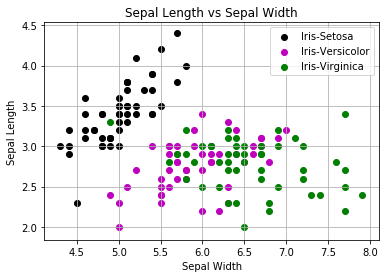

In [3]:
iris_setosa=df[df['flower']=='Iris-setosa']
iris_versicolor=df[df['flower']=='Iris-versicolor']
iris_virginica=df[df['flower']=='Iris-virginica']
plt.scatter(iris_setosa['sepal_length'],iris_setosa['sepal_width'],color='k',label='Iris-Setosa')
plt.scatter(iris_versicolor['sepal_length'],iris_versicolor['sepal_width'],color='m',label='Iris-Versicolor')
plt.scatter(iris_virginica['sepal_length'],iris_versicolor['sepal_width'],color='g',label='Iris-Virginica')
plt.grid()
plt.legend()
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Sepal Length vs Sepal Width')


Text(0.5,1,'Petal Length vs Petal Width')

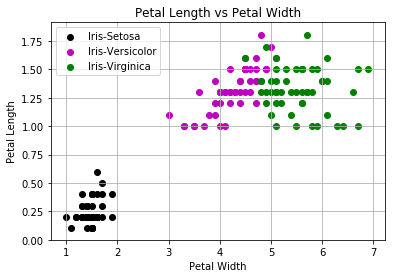

In [4]:
plt.scatter(iris_setosa['petal_length'],iris_setosa['petal_width'],color='k',label='Iris-Setosa')
plt.scatter(iris_versicolor['petal_length'],iris_versicolor['petal_width'],color='m',label='Iris-Versicolor')
plt.scatter(iris_virginica['petal_length'],iris_versicolor['petal_width'],color='g',label='Iris-Virginica')
plt.grid()
plt.legend()
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Petal Length vs Petal Width')


## 2. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively.

In [5]:
flower_mapping={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['flower']=df['flower'].apply(lambda x:flower_mapping[x])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3. Split your data into training and testing data set, it should be a 80:20 split with random state 9032. 

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['petal_length','petal_width']],df['flower'],test_size=0.20,random_state=9032)

## 4. Obtain decision tree model for iris data set with **only petal length and width**. Depth should be 2. Show the decision tree. Obtain confusion matrix for the predictions.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
decisiontree= DecisionTreeClassifier(criterion='entropy',max_depth=2)
obtained_tree=decisiontree.fit(x_train,y_train)

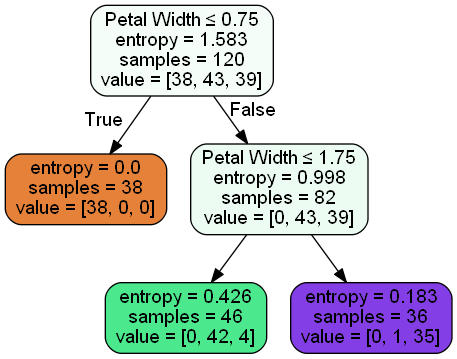

In [8]:
from sklearn.tree import export_graphviz
import pydotplus 
from IPython.display import Image
from io import StringIO
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=["Petal Length","Petal Width"],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

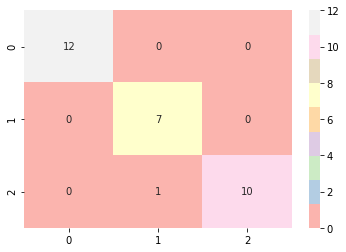

In [9]:
import seaborn 
Predicted_flower=obtained_tree.predict(x_test)
seaborn.heatmap(confusion_matrix(y_test,Predicted_flower),annot=True,cmap='Pastel1') 

## 5. Plot the decision tree boundaries of the **training dataset** using the mesh grid approach. The output may be one of the two figures given below. 

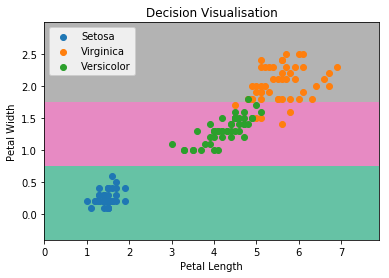

In [10]:
x_min,x_max=df['petal_length'].min()-1,df['petal_length'].max()+1
y_min,y_max=df['petal_width'].min()-0.5,df['petal_width'].max()+0.5
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
xx_lin=xx.ravel()
yy_lin=yy.ravel()
pred_inupt=np.c_[xx_lin,yy_lin]
DT=decisiontree.predict(pred_inupt)
DT=DT.reshape(xx.shape)
decisiontree.predict([[0,0],[1,1]])
plt.contourf(xx,yy,DT,cmap='Set2')
plt.scatter(iris_setosa.petal_length,iris_setosa.petal_width,label='Setosa')
plt.scatter(iris_virginica.petal_length,iris_virginica.petal_width,label='Virginica')
plt.scatter(iris_versicolor.petal_length,iris_versicolor.petal_width,label='Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Visualisation')
plt.legend()

### Write down the observations when step numbers 4 & 5 are performed over a depth of tree 3 & 4. The comparison should be wrt entropy, confusion matrix and decision tree plot. Also plot the decision tree boundaries with the mesh grid.


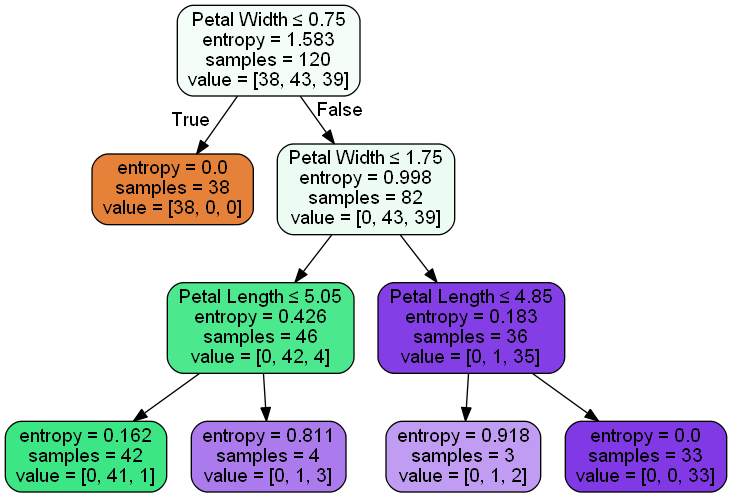

In [11]:
## For Depth 3
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
decisiontree3= DecisionTreeClassifier(criterion='entropy',max_depth=3)
obtained_tree3=decisiontree3.fit(x_train,y_train)
from sklearn.tree import export_graphviz
import pydotplus 
from IPython.display import Image
from io import StringIO
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree3,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=["Petal Length","Petal Width"],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())


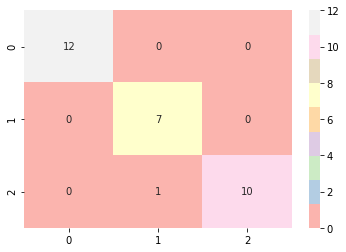

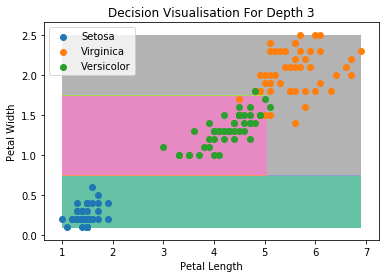

In [12]:
import seaborn 
Predicted_flower3=obtained_tree3.predict(x_test)
seaborn.heatmap(confusion_matrix(y_test,Predicted_flower3),annot=True,cmap='Pastel1') 

plt.figure()
x_min,x_max=df['petal_length'].min(),df['petal_length'].max()
y_min,y_max=df['petal_width'].min(),df['petal_width'].max()
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
xx_lin=xx.ravel()
yy_lin=yy.ravel()
pred_inupt=np.c_[xx_lin,yy_lin]
SVC_Z=decisiontree3.predict(pred_inupt)
SVC_Z=SVC_Z.reshape(xx.shape)
plt.contourf(xx,yy,SVC_Z,cmap='Set2')
plt.scatter(iris_setosa.petal_length,iris_setosa.petal_width,label='Setosa')
plt.scatter(iris_virginica.petal_length,iris_virginica.petal_width,label='Virginica')
plt.scatter(iris_versicolor.petal_length,iris_versicolor.petal_width,label='Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Visualisation For Depth 3')
plt.legend()

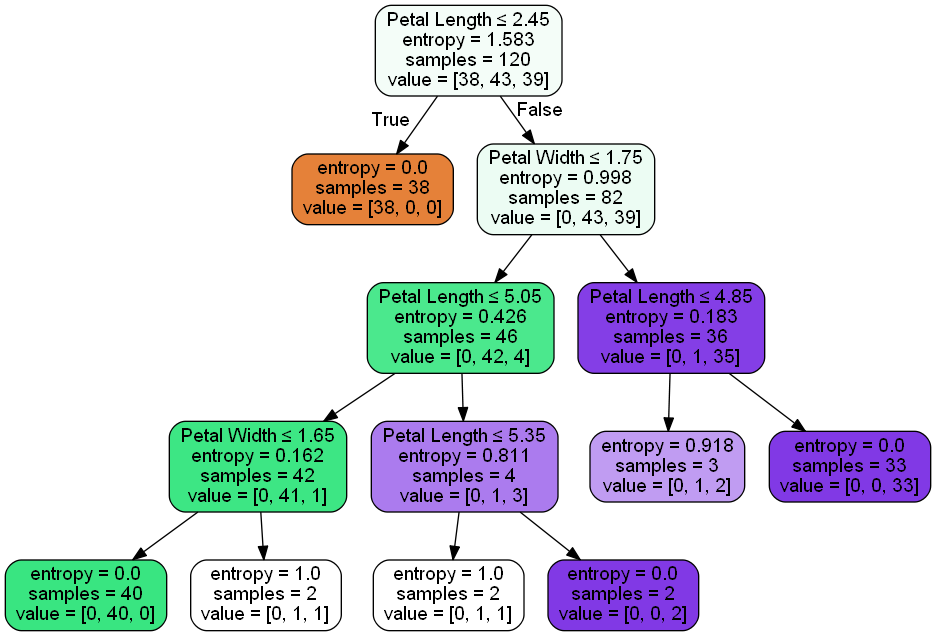

In [15]:
## For Depth 4
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
decisiontree4= DecisionTreeClassifier(criterion='entropy',max_depth=4)
obtained_tree4=decisiontree4.fit(x_train,y_train)
from sklearn.tree import export_graphviz
import pydotplus 
from IPython.display import Image
from io import StringIO
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree4,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=["Petal Length","Petal Width"],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())


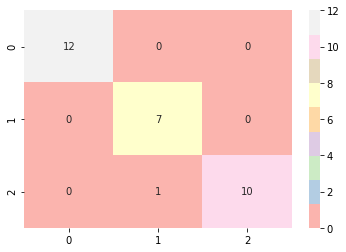

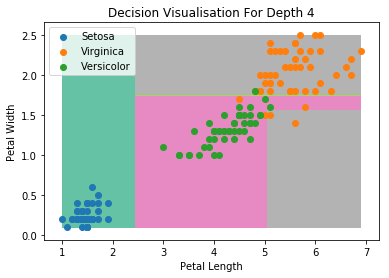

In [14]:
import seaborn 
Predicted_flower4=obtained_tree.predict(x_test)
seaborn.heatmap(confusion_matrix(y_test,Predicted_flower4),annot=True,cmap='Pastel1') 



plt.figure()
x_min,x_max=df['petal_length'].min(),df['petal_length'].max()
y_min,y_max=df['petal_width'].min(),df['petal_width'].max()
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
xx_lin=xx.ravel()
yy_lin=yy.ravel()
pred_inupt=np.c_[xx_lin,yy_lin]
SVC_Z=decisiontree4.predict(pred_inupt)
SVC_Z=SVC_Z.reshape(xx.shape)
plt.contourf(xx,yy,SVC_Z,cmap='Set2')
plt.scatter(iris_setosa.petal_length,iris_setosa.petal_width,label='Setosa')
plt.scatter(iris_virginica.petal_length,iris_virginica.petal_width,label='Virginica')
plt.scatter(iris_versicolor.petal_length,iris_versicolor.petal_width,label='Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Visualisation For Depth 4')
plt.legend()

## CONCLUSION
From the above plotting we got know that when the value of max depth increases the size of decision tree increases which could give us more accurate prediction.But as seen above there is no difference between the confusion matrix